# Introduction to Sentiment Classifiers 

- using machine learning methods to pinpoint the sentiment of text
- is this product review positive or negative? 
- is this customer email satisfied or disatisfied? 
- how are people reacting to our advertisement? 
- useful not only for sales - politics/ law making/ sociology/ psychology

# Challenges 

- Sarcasm, irony, implication hard to define 
- change of tone in text 
- *"This book was terrible, not because it was bad, but because it was so good: I couldn't put it down until I finished the final pages at 3 in the morning. Not a good thing, when your alarm goes off at 5:50 AM"*

# Introduction to Syuzhet

- Four sentiment dictionaries 
- Created not only to analyse single sentences, but to explore narrative shifts in books and longer pieces of text 
- the following is adapted from Matthew Jockers Syuzhet vignette

# Diving into an example 

We have a collection of book reviews that we have scraped from our product site. 

In [5]:
library(syuzhet)
book_reviews <- "This book had me hooked for hours. 
    A light read. 
    This book was terrible, not because it was bad, but because it was so good. 
    I realized, too late to get my fifty cents back, that this is CHICK LIT.
    The plot often felt contrived, as pieces fell together too nicely. 
    Wow, I'm really torn as to what to say about this book.
    I began reading this book and fell in love with it. 
    Reading this book was like an up-hill battle for me.
    This book was a game changer for me.
    Damn if you aren't one of the most problematic things I've ever read.
    Golden has hit pay dirt with this masterpiece.
    I had my doubts about this book, but I'm happy to say I was wrong."

## get_sentences() 
- splits text into sentences and stores sentences in a vector

In [13]:
sentences <- get_sentences(book_reviews)
class(sentences)

[1] "character"

In [16]:
sentences[1:3]

[1] "This book had me hooked for hours."                                         
[2] "A light read."                                                              
[3] "This book was terrible, not because it was bad, but because it was so good."

## get_sentiment()

- the get_sentiment function looks for the sentiment of each word or sentence. 
- The function takes two arguments: a character vector and a "method", which refers to which of the four sentiment dictionaries to use. The default is the "syuzhet" method. 
- Other methods are "bing", "afinn", "nrc" and "stanford" 

In [18]:
get_sentiment(sentences, method = "syuzhet")
# each output value is an assessment of the sentiment in each sentence

[1]  0.00  0.00 -0.75 -0.25  0.25  0.00  0.35  0.10  0.00 -1.75  0.50 -0.50

# Each method uses a slightly different scale

In [19]:
get_sentiment(sentences, method = "bing")

[1]  0  0 -1  0 -2  1  0  1  0 -2  1 -1

In [21]:
get_sentiment(sentences, method = "afinn")

[1]  0  0 -3  0  0  2  3  1  0 -4  1  0

In [22]:
get_sentiment(sentences, method = "nrc")

[1] -1  0 -1 -1 -1 -1  1  0  0 -1  0  0

# Short Exercise 

### -put a favourite quote into the get_sentiment( ) function

In [23]:
### your code goes here ###

# For longer extracts, we can sum the values to get a measure of the overall feel to a review

In [26]:
review <- "I think the reason I waited so long to read this series is because I just couldn't imagine myself enjoying reading about an eleven-year-old boy and his adventures at a school of wizardry. 
I thought it would be too juvenile for my taste. 
I was wrong, of course.
I can honestly say that I loved every minute of this. 
It's a spectacular little romp with funny, courageous, and endearing characters that you can't help but love.
It has talking chess pieces, singing hats, a giant three-headed dog named Fluffy, a hilarious giant with a dragon fetish, a master wizard that's just a little bit crazy, mail carrier owls, goblins running a bank, unicorns, centaurs(!), trolls . . . and probably much more that I'm forgetting."
tokenized_review <- get_sentences(review)

In [27]:
head(tokenized_review)

[1] "I think the reason I waited so long to read this series is because I just couldn't imagine myself enjoying reading about an eleven-year-old boy and his adventures at a school of wizardry."                                                
[2] "I thought it would be too juvenile for my taste."                                                                                                                                                                                           
[3] "I was wrong, of course."                                                                                                                                                                                                                    
[4] "I can honestly say that I loved every minute of this."                                                                                                                                                                                      
[5] "It's a spectacular little romp with funny, courageous, and endearing characters that you can't help but love."                                                                                                                              
[6] "It has talking chess pieces, singing hats, a giant three-headed dog named Fluffy, a hilarious giant with a dragon fetish, a master wizard that's just a little bit crazy, mail carrier owls, goblins running a bank, unicorns, centaurs(!),"

## A positive number. Looks like this is quite a positive review. 

In [29]:
sum(get_sentiment(tokenized_review, method = "nrc"))

[1] 5

### Syuzhet can do more than classify sentences and short excerpts. It can also graph a story's narrative structure, plotting the emotional changes that occur through the text. While there have been some debate about how reliable this the algorithm is, it has been shown to be accurate on a number of literary texts.  

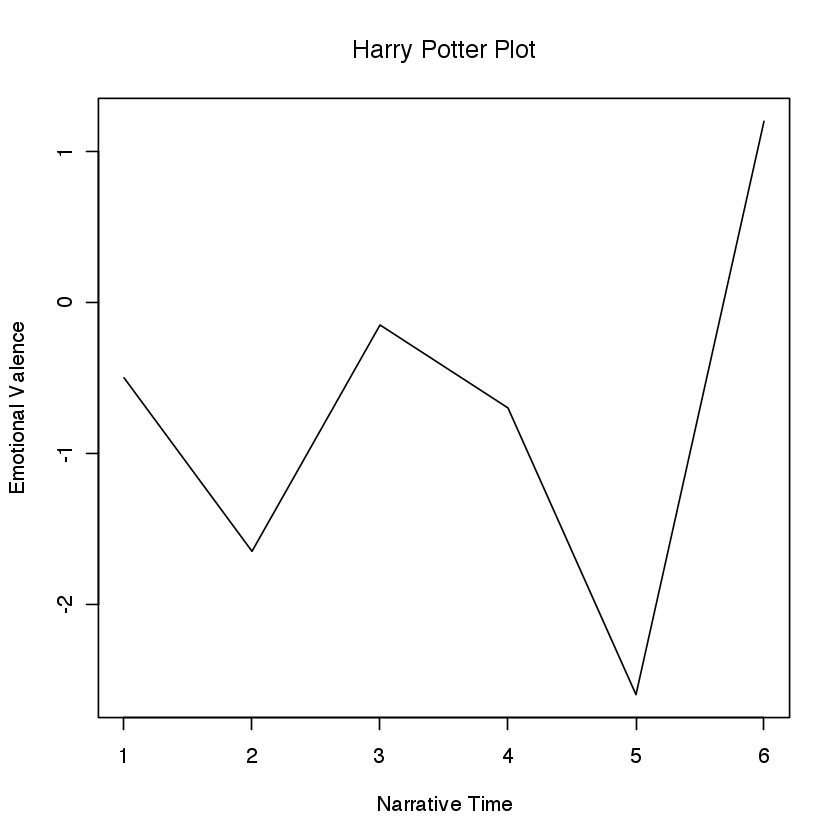

In [31]:
story <- "Poor Harry Potter. After his parents are killed, the lonely 10-year-old is living under the stairs in the detestable Dursley household. A mysterious letter arrives, inviting him to Hogwarts School of Witchcraft and Wizardry. Suddenly, some things start to make sense- why he is loathed by his relatives, all Muggles (non-magic people), why he has a lighting bolt scar on his forehead, and how his future might be better than his past. Harry is a celebrity at Hogwarts, the only person to escape the clutches of the evil Dark Lord--He-who-must-not-be-named, who killed his parents and left him the scar. In this book, Harry meets characters that stay throughout the series, stalwart friends Ron Weasley and Hermione Granger, enemy Draco Malfoy, Professor Severus Snape, Headmaster Albus Dumbledore, and Hagrid, the giant who loves animals."
narrative <- get_sentences(story) 
narrative <- get_sentiment(narrative) 
plot(
    narrative,
    type = "l",
    main = "Harry Potter Plot", 
    xlab = "Narrative Time",
    ylab = "Emotional Valence")

# Integrating Sentiment Analysis with Visualisations: How Characters Change in War and Peace 

This analysis was posted by Microsoft on their data science blog. Worth a look. 

### Table of characters and emotional changes throghout the book

![alt text](warandpeacetable.png)

### Visualise changes through a d3 heatmap 

![alt text](warandpeaced3.png)